## WorkFlow

### [Healthcare Diabetes Dataset](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes)

### Pre-Processing

### Modelling

### [Evaluation](#Training-and-Evaluation)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(2768, 10)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


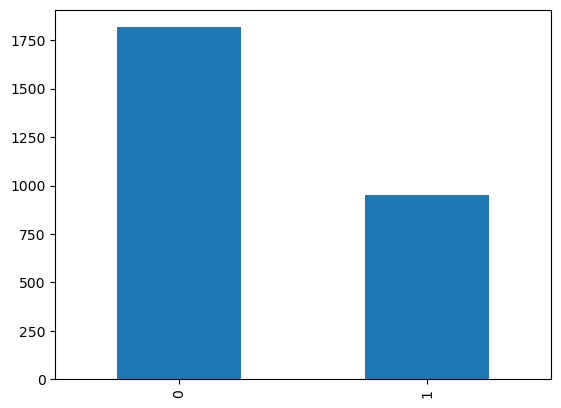

In [8]:
df["Outcome"].value_counts().plot(kind="bar")
plt.show()

In [9]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
X = df.drop(['Id' ,'Outcome'] , axis=1)
y =  df['Outcome'].values

In [13]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(X,y,test_size=0.2,random_state=2)

## Training and Evaluation

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score

In [15]:
bc = BaggingClassifier(n_estimators=150, random_state=2)
bc.fit(xtrain,ytrain)

BaggingClassifier(n_estimators=150, random_state=2)

In [17]:
ypred = bc.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[370   0]
 [  4 180]]
0.9927797833935018


In [18]:
ypred = bc.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(accuracy_score(ytrain,ypred))

[[1446    0]
 [   0  768]]
1.0
